Project #1, Group 1

Group Members: Ishika Bhattarai, Julian Bernabe-Hernandez, Brendan Higgins, Addy Tran

In [3]:
# reading in the libraries and functions that we will need as we do this work.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import scipy.stats as st
import statsmodels.api as sm 
import pylab as py 

# here are some of the tools we will use for our analyses
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
Ames = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/ames2.csv", na_values=['NA'])
# remove rows with missing data
Ames.dropna(inplace=True)
Ames.head()

,LotArea,GrLivArea,OverallQual,FullBath,TotalPorchSF,BsmtFinSF1,GaragedCat,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YrSold,BsmtUnfSF,GarageArea,MoSold,PavedDrive01,MSSubClass,logSalePrice
0,9120,1820,7,2,100,329,1,8,1026,1925,2008,697,240,6,0,50,12.122691
1,4060,1337,6,2,68,266,0,5,1405,1998,2008,1139,511,8,1,120,12.106252
2,34650,1056,5,1,0,1056,0,5,1056,1955,2006,0,572,1,1,190,11.884489
3,21750,1771,5,1,0,0,0,9,0,1960,2009,0,336,11,1,20,11.652687
4,11500,845,4,1,0,0,1,5,0,1957,2009,0,290,1,0,20,11.338572


Root Mean Squared Error: 0.18252543036558802
Coefficients: [0.00025626 0.1427123  0.00046361]
Intercept: 10.544314088538577


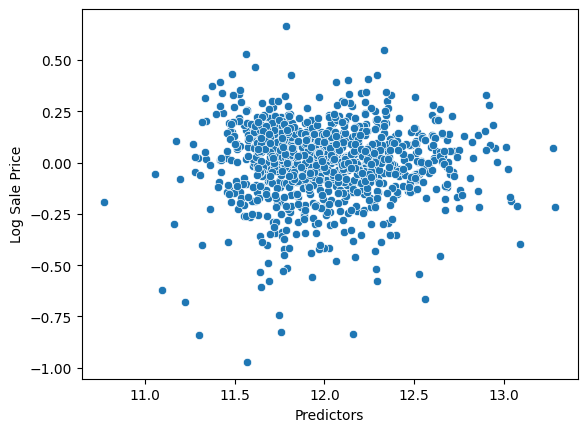

In [85]:
X = Ames[['GrLivArea', 'OverallQual', 'GarageArea']]  # Features (2D array)
y = Ames['logSalePrice']  


# Create a linear regression model
p_model = LinearRegression()

# Fit the model on the  data
p_model.fit(X, y)

# Make predictions on the  data
y_hat = p_model.predict(X)


# a look at the residual vs fitted plot
sns.scatterplot(x=y_hat, y=y-y_hat)
plt.ylabel('Log Sale Price')
plt.xlabel('Predictors')
# Evaluate the model performance
rmse = root_mean_squared_error(y, y_hat)
print('Root Mean Squared Error:', rmse)

# Get the coefficients and intercept
print('Coefficients:', p_model.coef_)
print('Intercept:', p_model.intercept_)

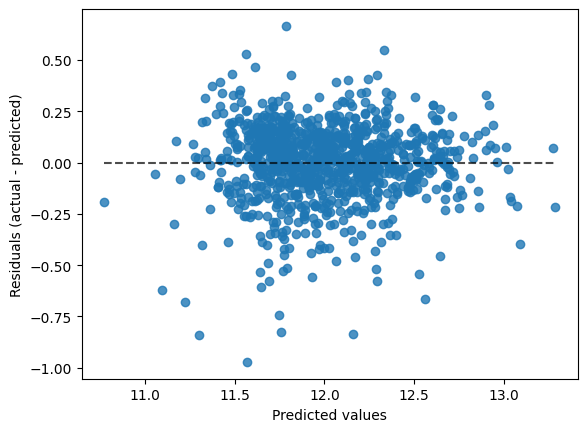

In [86]:
# below makes a residual vs predicted values plot
display = PredictionErrorDisplay(y_true=y, y_pred=y_hat)
display.plot()
plt.show()

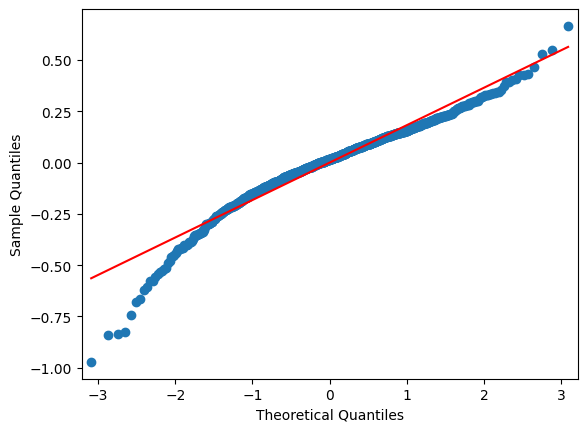

In [87]:
# calculate the residuals 
Ames_residuals = y - y_hat
# generate the qq plot and put a line through the points to help us visualize the relationship here    
sm.qqplot(Ames_residuals, line ='s') 
# 
py.show() 

In [79]:
x2 = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())
print("Highest Adj R^2 is .795 with OverallQual, GrLivArea, and GarageArea as predictors")

                            OLS Regression Results                            
Dep. Variable:           logSalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1296.
Date:                Thu, 05 Feb 2026   Prob (F-statistic):               0.00
Time:                        16:31:09   Log-Likelihood:                 281.93
No. Observations:                1000   AIC:                            -555.9
Df Residuals:                     996   BIC:                            -536.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5443      0.026    400.796      

In [4]:
#newcode